In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pyplot
import seaborn as sns
%matplotlib inline 
data = pd.read_csv("Amazon Sales Records.csv",encoding = 'latin-1')

In [2]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,07-26-2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,07-30-2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [3]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [6]:
data['Region'] = data['Region'].astype(str)
data['Country'] = data['Country'].astype(str)
data['Item Type'] = data['Item Type'].astype(str)
data['Sales Channel'] = data['Sales Channel'].astype(str)
data['Order Priority'] = data['Order Priority'].astype(str)

In [7]:
data[['Units Sold', 'Unit Price',	'Unit Cost', 'Total Revenue', 'Total Cost',	'Total Profit']].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [8]:
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Date MonthYear'] = data['Order Date'].dt.strftime('%Y-%m')
data = data.drop(columns=['Order Date'])

In [9]:
df = data

In [10]:
df.isnull().sum()

Region                  0
Country                 0
Item Type               0
Sales Channel           0
Order Priority          0
Order ID                0
Ship Date               0
Units Sold              0
Unit Price              0
Unit Cost               0
Total Revenue           0
Total Cost              0
Total Profit            0
Order Month             0
Order Year              0
Order Date MonthYear    0
dtype: int64

In [11]:
pd.set_option('display.max_rows', None)
df['Country'].value_counts()

The Gambia                          4
Sierra Leone                        3
Sao Tome and Principe               3
Mexico                              3
Australia                           3
Djibouti                            3
Switzerland                         2
Myanmar                             2
Norway                              2
Turkmenistan                        2
Cameroon                            2
Bulgaria                            2
Honduras                            2
Azerbaijan                          2
Libya                               2
Rwanda                              2
Mali                                2
Gabon                               1
Belize                              1
Haiti                               1
Lithuania                           1
San Marino                          1
United Kingdom                      1
Austria                             1
Fiji                                1
Madagascar                          1
Cote d'Ivoir

Box Plot for Total Revenue 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


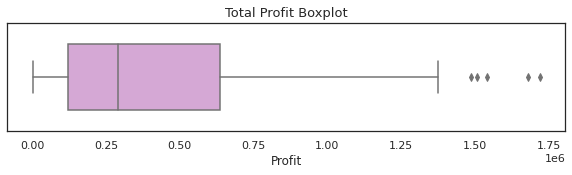

In [12]:
import matplotlib.pyplot as plt
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Total Profit'], color="plum", width=.6)

plt.title('Total Profit Boxplot', fontsize=13)
plt.xlabel('Profit')
plt.show()

In [13]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 2rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [14]:
outliers = detect_outliers(df, df["Total Profit"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                               Europe
Coun

In [15]:
print(outliers)

[13, 30, 33, 46, 74, 79, 93]


In [16]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Profit column of dataframe data ")

The list has 7 outliers in Total Profit column of dataframe data 


In [17]:
df[df['Country'] == 'Honduras']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
13,Central America and the Caribbean,Honduras,Household,Offline,H,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,2,2017,2017-02
22,Central America and the Caribbean,Honduras,Snacks,Online,L,795490682,2016-07-26,2225,152.58,97.44,339490.50,216804.00,122686.50,6,2016,2016-06


In [18]:
df[df['Country'] == 'Switzerland']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
30,Europe,Switzerland,Cosmetics,Offline,M,249693334,2012-10-20,8661,437.20,263.33,3786589.20,2280701.13,1505888.07,9,2012,2012-09
47,Europe,Switzerland,Personal Care,Online,M,617667090,2011-01-31,273,81.73,56.67,22312.29,15470.91,6841.38,12,2010,2010-12


In [19]:
df[df['Country'] == 'Myanmar']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
33,Asia,Myanmar,Household,Offline,H,177713572,2015-03-01,8250,668.27,502.54,5513227.5,4145955.0,1367272.5,1,2015,2015-01
44,Asia,Myanmar,Clothes,Online,H,223359620,2015-11-18,5930,109.28,35.84,648030.4,212531.2,435499.2,11,2015,2015-11


In [20]:
df[df['Country'] == 'Iceland']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
46,Europe,Iceland,Cosmetics,Online,C,331438481,2016-12-31,8867,437.2,263.33,3876652.4,2334947.11,1541705.29,12,2016,2016-12


In [21]:
df[df['Country'] == 'Pakistan']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
74,Middle East and North Africa,Pakistan,Cosmetics,Offline,L,231145322,2013-08-16,9892,437.2,263.33,4324782.4,2604860.36,1719922.04,7,2013,2013-07


In [22]:
df[df['Country'] == 'Samoa']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear


In [23]:
df[df['Country'] == 'Romania']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
93,Europe,Romania,Cosmetics,Online,H,660643374,2010-12-25,7910,437.2,263.33,3458252.0,2082940.3,1375311.7,11,2010,2010-11


Box Plot of Total Cost 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


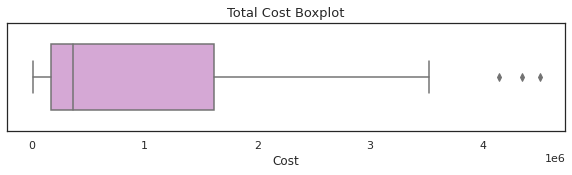

In [24]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Total Cost'], color="plum", width=.6)

plt.title('Total Cost Boxplot', fontsize=13)
plt.xlabel('Cost')
plt.show()

In [25]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 3rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [26]:
outliers = detect_outliers(df, df["Total Cost"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                                 Asia
Coun

In [27]:
print(outliers)

[13, 33, 38, 68, 75]


In [28]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Cost column of dataframe data ")

The list has 5 outliers in Total Cost column of dataframe data 


In [29]:
df[df['Country'] == 'Myanmar']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
33,Asia,Myanmar,Household,Offline,H,177713572,2015-03-01,8250,668.27,502.54,5513227.5,4145955.0,1367272.5,1,2015,2015-01
44,Asia,Myanmar,Clothes,Online,H,223359620,2015-11-18,5930,109.28,35.84,648030.4,212531.2,435499.2,11,2015,2015-11


In [30]:
df[df['Country'] == 'Honduras']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
13,Central America and the Caribbean,Honduras,Household,Offline,H,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,2,2017,2017-02
22,Central America and the Caribbean,Honduras,Snacks,Online,L,795490682,2016-07-26,2225,152.58,97.44,339490.50,216804.00,122686.50,6,2016,2016-06


In [31]:
df[df['Country'] == 'Brunei']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
38,Asia,Brunei,Office Supplies,Online,L,320009267,2012-05-08,6708,651.21,524.96,4368316.68,3521431.68,846885.0,4,2012,2012-04


In [32]:
df[df['Country'] == 'Lithuania']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
68,Europe,Lithuania,Office Supplies,Offline,H,166460740,2010-11-17,8287,651.21,524.96,5396577.27,4350343.52,1046233.75,10,2010,2010-10


In [33]:
df[df['Country'] == 'Mexico']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
75,North America,Mexico,Household,Offline,C,986435210,2014-12-12,6954,668.27,502.54,4647149.58,3494663.16,1152486.42,11,2014,2014-11
85,North America,Mexico,Personal Care,Offline,L,430915820,2012-03-20,6422,81.73,56.67,524870.06,363934.74,160935.32,2,2012,2012-02
98,North America,Mexico,Personal Care,Offline,M,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,7,2015,2015-07


Box Plot of Total Revenue

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


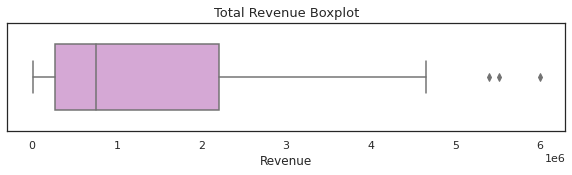

In [34]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Total Revenue'], color="plum", width=.6)

plt.title('Total Revenue Boxplot', fontsize=13)
plt.xlabel('Revenue')
plt.show()

In [35]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 3rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [36]:
outliers = detect_outliers(df, df["Total Revenue"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                                 Asia
Coun

In [37]:
print(outliers)

[13, 33, 38, 68, 74, 75]


In [38]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Revenue column of dataframe data ")

The list has 6 outliers in Total Revenue column of dataframe data 


In [39]:
df[df['Country'] == 'Honduras']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
13,Central America and the Caribbean,Honduras,Household,Offline,H,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,2,2017,2017-02
22,Central America and the Caribbean,Honduras,Snacks,Online,L,795490682,2016-07-26,2225,152.58,97.44,339490.50,216804.00,122686.50,6,2016,2016-06


In [40]:
df[df['Country'] == 'Myanmar']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
33,Asia,Myanmar,Household,Offline,H,177713572,2015-03-01,8250,668.27,502.54,5513227.5,4145955.0,1367272.5,1,2015,2015-01
44,Asia,Myanmar,Clothes,Online,H,223359620,2015-11-18,5930,109.28,35.84,648030.4,212531.2,435499.2,11,2015,2015-11


In [41]:
df[df['Country'] == 'Brunei']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
38,Asia,Brunei,Office Supplies,Online,L,320009267,2012-05-08,6708,651.21,524.96,4368316.68,3521431.68,846885.0,4,2012,2012-04


In [42]:
df[df['Country'] == 'Lithuania']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
68,Europe,Lithuania,Office Supplies,Offline,H,166460740,2010-11-17,8287,651.21,524.96,5396577.27,4350343.52,1046233.75,10,2010,2010-10


In [43]:
df[df['Country'] == 'Pakistan']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
74,Middle East and North Africa,Pakistan,Cosmetics,Offline,L,231145322,2013-08-16,9892,437.2,263.33,4324782.4,2604860.36,1719922.04,7,2013,2013-07


In [44]:
df[df['Country'] == 'Mexico']

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
75,North America,Mexico,Household,Offline,C,986435210,2014-12-12,6954,668.27,502.54,4647149.58,3494663.16,1152486.42,11,2014,2014-11
85,North America,Mexico,Personal Care,Offline,L,430915820,2012-03-20,6422,81.73,56.67,524870.06,363934.74,160935.32,2,2012,2012-02
98,North America,Mexico,Personal Care,Offline,M,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,7,2015,2015-07


Box Plot of Unit Cost 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


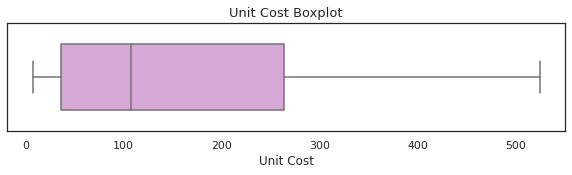

In [45]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Unit Cost'], color="plum", width=.6)

plt.title('Unit Cost Boxplot', fontsize=13)
plt.xlabel('Unit Cost')
plt.show()

Box Plot of Unit Price

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


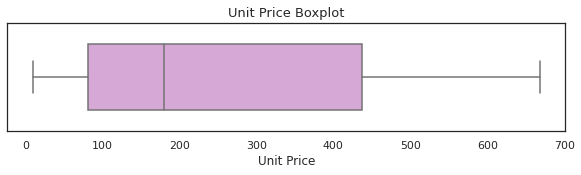

In [46]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Unit Price'], color="plum", width=.6)

plt.title('Unit Price Boxplot', fontsize=13)
plt.xlabel('Unit Price')
plt.show()

Box Plot of Unit Sold 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


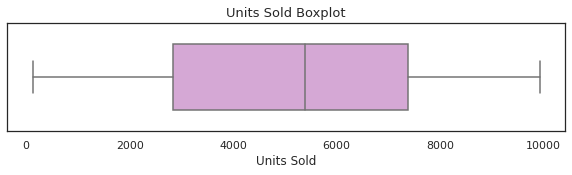

In [47]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Units Sold'], color="plum", width=.6)

plt.title('Units Sold Boxplot', fontsize=13)
plt.xlabel('Units Sold')
plt.show()

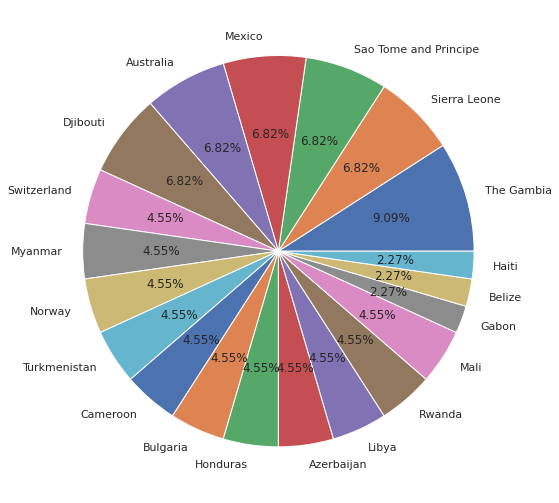

In [48]:
import matplotlib.pyplot as plt 
country_names = df.Country.value_counts().index
country_val = df.Country.value_counts().values
# Pie Chart for top 20 country
fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_val[:20],labels=country_names[:20],autopct='%1.2f%%')
plt.show()

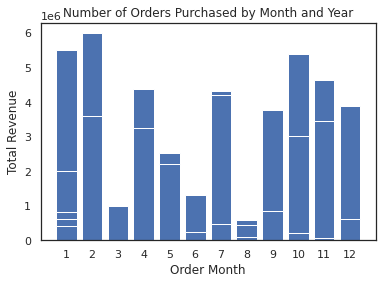

In [49]:
# Create a bar chart
plt.bar(df['Order Month'], df['Total Revenue'])

# Set the chart title and axis labels
plt.title('Number of Orders Purchased by Month and Year')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')

# Rotate the x-axis labels for better readability

# Display the chart
plt.show()

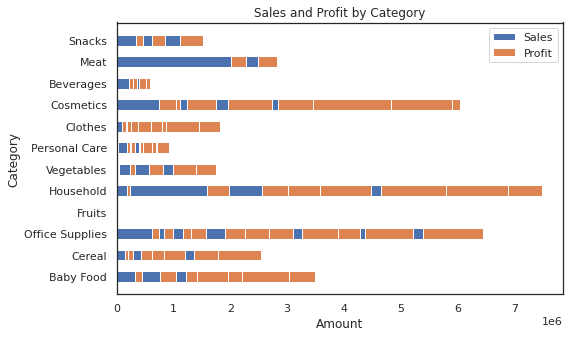

In [50]:
# Set the figure size
fig, ax = plt.subplots(figsize=(8, 5))

# Create the bar plot
ax.barh(df['Item Type'], df['Total Revenue'], height=0.5, label='Sales')
ax.barh(df['Item Type'], df['Total Profit'], height=0.5, left=df['Total Revenue'], label='Profit')

# Set the axis labels and chart title
ax.set_xlabel('Amount')
ax.set_ylabel('Category')
ax.set_title('Sales and Profit by Category')

# Add a legend
ax.legend()

# Display the chart
plt.show()

Text(0.5, 1.0, 'Profit per year')

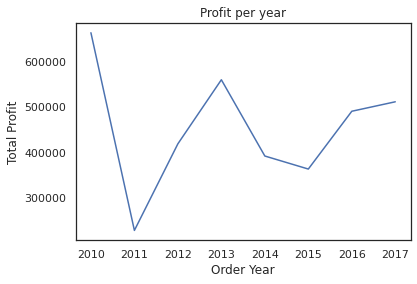

In [51]:
df.groupby('Order Year')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Profit per year')

In [52]:
total_revenue = df['Total Revenue'].sum()
total_revenue

137348768.31

In [53]:
average_revenue = df['Total Revenue'].mean()
average_revenue

1373487.6831

In [54]:
max_revenue = df['Total Revenue'].max()
max_revenue

5997054.98

In [55]:
min_revenue = df['Total Revenue'].min()
min_revenue

4870.26

In [56]:
revenue_by_category = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
revenue_by_category

Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64

In [57]:
profit_by_category = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)
profit_by_category

Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total Profit, dtype: float64

In [58]:
print(df[['Total Revenue', 'Total Cost', 'Total Profit']].corr())

               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.983928      0.897327
Total Cost          0.983928    1.000000      0.804091
Total Profit        0.897327    0.804091      1.000000


Predictive Analytics 

In [59]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df["Item Type"] = le.fit_transform(df["Item Type"])
df["Sales Channel"] = le.fit_transform(df["Sales Channel"])
df["Order Priority"] = le.fit_transform(df["Order Priority"])

In [60]:
# Drop 
df = df.drop("Region", axis=1)
df = df.drop("Country", axis=1)
df = df.drop("Order Date MonthYear", axis=1)
df = df.drop("Order ID", axis=1)
df = df.drop("Ship Date", axis=1)

In [61]:
df.head()

,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,0,0,1,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010
1,2,1,0,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012
2,8,0,2,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014
3,5,1,0,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
4,8,0,2,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013


In [62]:
df_auto_ml = df

In [63]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
from pycaret.regression import *

In [82]:
reg = setup(data=df_auto_ml,target='Total Profit')

,Description,Value
0,Session id,789
1,Target,Total Profit
2,Target type,Regression
3,Original data shape,"(100, 11)"
4,Transformed data shape,"(100, 11)"
5,Transformed train set shape,"(70, 11)"
6,Transformed test set shape,"(30, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [83]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0555,0.0073,0.0803,1.0000,0.0000,0.0000,0.7860
ridge,Ridge Regression,0.0554,0.0072,0.0801,1.0000,0.0000,0.0000,0.1030
lar,Least Angle Regression,0.0562,0.0073,0.0809,1.0000,0.0000,0.0000,0.1030
llar,Lasso Least Angle Regression,0.0471,0.0066,0.0759,1.0000,0.0000,0.0000,0.1060
br,Bayesian Ridge,0.0555,0.0073,0.0803,1.0000,0.0000,0.0000,0.0460
par,Passive Aggressive Regressor,118.3924,67445.6735,160.6448,1.0000,0.0006,0.0004,0.0480
huber,Huber Regressor,0.0726,0.0108,0.0961,1.0000,0.0000,0.0000,0.0680
en,Elastic Net,2453.6362,11996625.9804,3235.8548,0.9999,0.1750,0.1833,0.0910
lasso,Lasso Regression,2659.2731,14141084.1593,3526.0075,0.9999,0.1819,0.1948,0.0970
et,Extra Trees Regressor,59173.1120,9032451903.1281,83903.9799,0.9551,0.3810,0.4060,0.2980


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

In [84]:
llar_model = create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0376,0.0032,0.0569,1.0000,0.0000,0.0000
1,0.0563,0.0082,0.0903,1.0000,0.0000,0.0000
2,0.0588,0.0067,0.0818,1.0000,0.0000,0.0000
3,0.0460,0.0068,0.0824,1.0000,0.0000,0.0000
4,0.0245,0.0010,0.0319,1.0000,0.0000,0.0000
5,0.0396,0.0057,0.0753,1.0000,0.0000,0.0000
6,0.0896,0.0197,0.1403,1.0000,0.0000,0.0000
7,0.0399,0.0063,0.0796,1.0000,0.0000,0.0000
8,0.0293,0.0014,0.0379,1.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [91]:
tuned_llar_model = tune_model(llar_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0377,0.0033,0.0571,1.0000,0.0000,0.0000
1,0.0563,0.0082,0.0903,1.0000,0.0000,0.0000
2,0.0597,0.0068,0.0824,1.0000,0.0000,0.0000
3,0.0462,0.0068,0.0824,1.0000,0.0000,0.0000
4,0.0244,0.0010,0.0318,1.0000,0.0000,0.0000
5,0.0396,0.0057,0.0753,1.0000,0.0000,0.0000
6,0.0896,0.0197,0.1403,1.0000,0.0000,0.0000
7,0.0399,0.0063,0.0796,1.0000,0.0000,0.0000
8,0.0293,0.0014,0.0379,1.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


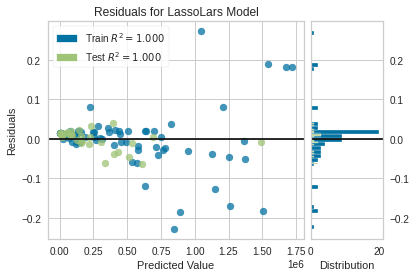

In [92]:
plot_model(tuned_llar_model)

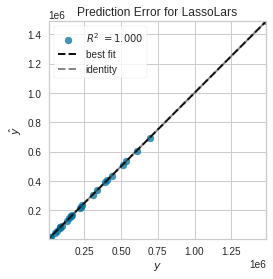

In [94]:
plot_model(tuned_llar_model, plot="error")

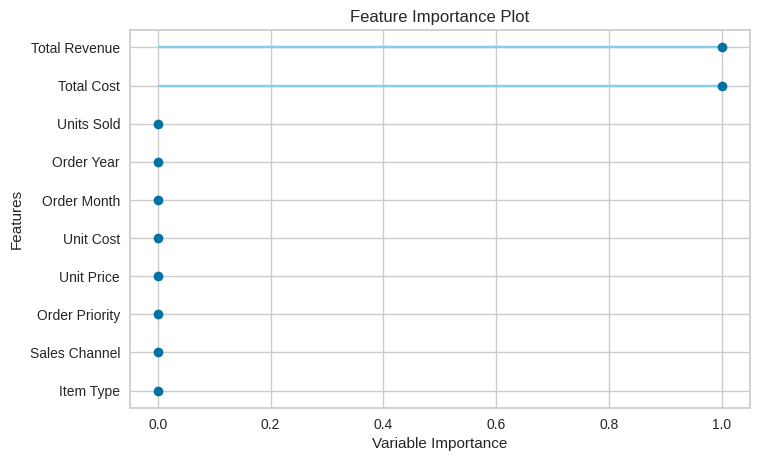

In [95]:
plot_model(tuned_llar_model,plot='feature')

In [96]:
predict_model(tuned_llar_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,0.0186,0.0006,0.0247,1.0000,0.0000,0.0000


,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Month,Order Year,Total Profit,prediction_label
70,9,0,2,6409,81.730003,56.669998,5.238076e+05,3.631980e+05,5,2017,1.606095e+05,1.606095e+05
71,11,0,0,3732,154.059998,90.930000,5.749519e+05,3.393508e+05,9,2011,2.356012e+05,2.356012e+05
72,6,0,2,2370,668.270020,502.540009,1.583800e+06,1.191020e+06,5,2012,3.927801e+05,3.927801e+05
73,11,1,1,8082,154.059998,90.930000,1.245113e+06,7.348962e+05,7,2012,5.102167e+05,5.102166e+05
74,1,0,0,5430,47.450001,31.790001,2.576535e+05,1.726197e+05,4,2015,8.503380e+04,8.503381e+04
75,0,0,3,5559,255.279999,159.419998,1.419102e+06,8.862158e+05,2,2014,5.328858e+05,5.328857e+05
76,3,1,2,8263,109.279999,35.840000,9.029806e+05,2.961459e+05,1,2017,6.068348e+05,6.068347e+05
77,9,0,2,6422,81.730003,56.669998,5.248701e+05,3.639348e+05,2,2012,1.609353e+05,1.609353e+05
78,6,1,2,282,668.270020,502.540009,1.884521e+05,1.417163e+05,1,2012,4.673586e+04,4.673587e+04
79,1,0,0,5124,47.450001,31.790001,2.431338e+05,1.628920e+05,7,2014,8.024184e+04,8.024185e+04


LR

In [64]:
# Select the independent variables and target variable
X = df[['Item Type', 'Sales Channel', 'Order Priority', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Order Month', 'Order Year']]
y = df['Total Profit']

In [65]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
# Standardizing the dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
X_train = scaler.fit_transform(X_train)

In [68]:
X_test = scaler.transform(X_test)

In [69]:
from sklearn.linear_model import LinearRegression
## cross validation 
from sklearn.model_selection import cross_val_score

In [70]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [71]:
mse = cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=5)

In [72]:
np.mean(mse)

-6.727059692031499e-19

In [73]:
## prediction 
reg_pred = regression.predict(X_test)

In [74]:
reg_pred

array([2.25246900e+05, 4.36446250e+05, 6.32512500e+05, 8.52235800e+04,
       4.35499200e+05, 5.03358750e+05, 1.22686500e+05, 7.47939490e+05,
       7.82812000e+03, 9.51410500e+05, 6.34745900e+05, 1.50588807e+06,
       7.66835040e+05, 1.36727250e+06, 1.19685000e+05, 6.39077500e+05,
       1.46875140e+05, 2.35601160e+05, 6.06834720e+05, 5.32525000e+04,
       2.55718080e+05, 1.25802000e+03, 1.30091800e+04, 1.87545030e+05,
       5.39196480e+05, 1.22865120e+05, 7.55559000e+04, 1.51034700e+04,
       5.84073870e+05, 8.99040600e+04])

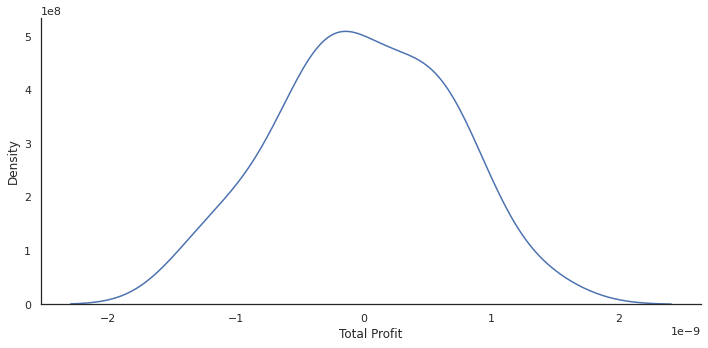

In [75]:
import seaborn as sns 
sns.displot(reg_pred - y_test,kind='kde', height=5, aspect=2)

In [76]:
from sklearn.metrics import r2_score
score = r2_score(reg_pred,y_test)

# Calculate the percentage of accuracy
accuracy_pct = score * 100

print("Accuracy: {:.2f}%".format(accuracy_pct))

# SVM AND LR to apply 

Accuracy: 100.00%


In [77]:
score

1.0

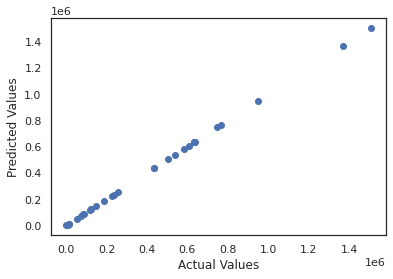

In [78]:
# Plot the predicted values against the actual values to visualize how well the model is fitting the data.
import matplotlib.pyplot as plt

plt.scatter(y_test, reg_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [79]:
# Calculate the mean squared error (MSE) or root mean squared error (RMSE) to quantify the model's performance.

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, reg_pred)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 4.2851929643772975e-19
RMSE: 6.546138529222627e-10


In [80]:
import plotly.graph_objs as go
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a linear regression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate the R-squared score
r2 = reg.score(X_test, y_test)

# Create a copy of the X_train numpy array with modified column names
X_train_df = pd.DataFrame(X_train, columns=['Item Type', 'Sales Channel', 'Order Priority', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Order Month', 'Order Year'])

# Extract the coefficients of the linear regression model
coef = reg.coef_

# Create a DataFrame with the coefficients and feature names
feature_importances = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': coef})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Create a bar chart of the feature importances using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=feature_importances['Feature'], y=feature_importances['Importance']))
fig.update_layout(title='Feature Importance (R-squared = {:.2f})'.format(r2),
                  xaxis_title='Feature',
                  yaxis_title='Importance',
                  xaxis_tickangle=-45)
fig.show()
